# Part 1: Forward Mode and Dual Numbers
Implement the methods for forward mode auto differentiation. We will do this piecewise by completing the methods for subtraction, multiplication, ln, and sin in that order. Once each operator functions as expected we will then compute the output node and its gradient for the function given in table 2 from the paper. 

The sections you should modify are marked with the #TODO comment. Functionality for addition and printing the Dual object are provided for you.

If you get stuck, remember that the rules for dual numbers are provided in equation 5 in the paper.

In [1]:
class DualAdd(object):
    """
    Instantiate the Dual object with a real and dual (epsilon) component. 
    For example, you would create the dual number X1=5 by calling Dual(5, 1) 
    if you wish to find dF/dX1 for the function F. All other input variables X2...Xn
    will be created by not specifying an epsilon component. 
    """
    def __init__(self, real=0, epsilon_coef=0):
        self.real = real
        self.epsilon_coef = epsilon_coef
        
    def __repr__(self):
        return f"Dual({self.real}, {self.epsilon_coef})"

    def __add__(self, other):
        # Create a copy of this object so that we can return a new instance of Dual
        # instead of mutating our variables.
        result = DualAdd(self.real, self.epsilon_coef)
        
        # Not specifying an epsilon component is the same as setting it to 0. This is
        # useful when other is a scalar.
        if type(other) is not DualAdd: 
            other = DualAdd(other)
            
        # Addition follows the same rules as complex addition.
        result.real += other.real
        result.epsilon_coef += other.epsilon_coef
        
        return result

Execute the following cell to find the value of y and its gradient with respect to x1. How would you change the evaluation to find dy/dx2?

In [2]:
x1 = DualAdd(2, 1)
x2 = DualAdd(5)
y = x1 + x2
print(f"y = {y.real}")
print(f"dy/dx1 = {y.epsilon_coef}")

# TODO add the code to evaluate and print dy/dx2
x1 = DualAdd(2)
x2 = DualAdd(5,1)
y = x1 + x2
print(f"y = {y.real}")
print(f"dy/dx2 = {y.epsilon_coef}")

y = 7
dy/dx1 = 1
y = 7
dy/dx2 = 1


Implement subtraction in the class DualSub below

In [3]:
class DualSub(object):
    def __init__(self, real=0, epsilon_coef=0):
        self.real = real
        self.epsilon_coef = epsilon_coef
        
    def __repr__(self):
        return f"Dual({self.real}, {self.epsilon_coef})"
   
    def __sub__(self, other):
        result = DualSub(self.real, self.epsilon_coef)
        if type(other) is not DualSub:
            other = DualSub(other)
          
        # TODO          
        result.real -= other.real
        result.epsilon_coef -= other.epsilon_coef
        
        return result

Execute the following cell to find the value of y and its gradient with respect to x1. How would you change the evaluation to find dy/dx2?

In [4]:
x1 = DualSub(2, 1)
x2 = DualSub(5)
y = x1 - x2
print(f"y = {y.real}")
print(f"dy/dx1 = {y.epsilon_coef}")

# TODO add the code to evaluate and print dy/dx2
x1 = DualSub(2)
x2 = DualSub(5,1)
y = x1 - x2
print(f"y = {y.real}")
print(f"dy/dx2 = {y.epsilon_coef}")

y = -3
dy/dx1 = 1
y = -3
dy/dx2 = -1


Implement multiplication for the class DualMul below

In [5]:
class DualMul(object):
    def __init__(self, real=0, epsilon_coef=0):
        self.real = real
        self.epsilon_coef = epsilon_coef
        
    def __repr__(self):
        return f"Dual({self.real}, {self.epsilon_coef})"
   
    def __mul__(self, other):
        result = DualMul(self.real, self.epsilon_coef)
        if type(other) is not DualMul:
            other = DualMul(other)
            
        # TODO
        result.real = self.real*other.real
        result.epsilon_coef = self.real*other.epsilon_coef + self.epsilon_coef*other.real
        return result

Execute the following cell to find the value of y and its gradient with respect to x1. How would you change the evaluation to find dy/dx2?

In [6]:
x1 = DualMul(2, 1)
x2 = DualMul(5)
y = x1 * x2
print(f"y = {y.real}")
print(f"dy/dx1 = {y.epsilon_coef}")

# TODO add the code to evaluate and print dy/dx2
x1 = DualMul(2)
x2 = DualMul(5,1)
y = x1 * x2
print(f"y = {y.real}")
print(f"dy/dx2 = {y.epsilon_coef}")

y = 10
dy/dx1 = 5
y = 10
dy/dx2 = 2


Implement the natural log function for the class DualLn below

In [7]:
import numpy as np
class DualLn(object):
    def __init__(self, real=0, epsilon_coef=0):
        self.real = real
        self.epsilon_coef = epsilon_coef
        
    def __repr__(self):
        return f"Dual({self.real}, {self.epsilon_coef})"
   
    def ln(other):
        # Notice the self argument is missing for this function. This is because 
        # ln is a uniary operator depending only on its input.
        if type(other) is not DualLn:
            other = DualLn(other)
            
        real = np.log(other.real) # TODO replace this line including the sentinal value 0
        epsilon_coef = other.epsilon_coef* 1/(other.real) # TODO replace this line including the sentinal value 0
        # We construct the result using only the input variable called other.
        result = DualLn(real, epsilon_coef)
        return result

In [8]:
x = DualLn(2, 1)
y = DualLn.ln(x)
print(f"y = {y.real}")
print(f"dy/dx = {y.epsilon_coef}")

y = 0.6931471805599453
dy/dx = 0.5


Implement the sine function in the class DualSin below

In [9]:
class DualSin(object):
    def __init__(self, real=0, epsilon_coef=0):
        self.real = real
        self.epsilon_coef = epsilon_coef
        
    def __repr__(self):
        return f"Dual({self.real}, {self.epsilon_coef})"
   
    def sin(other):
        # Notice the self argument is missing for this function. This is because 
        # ln is a unary operator depending only on its input.
        if type(other) is not DualSin:
            other = DualSin(other)
            
        real = np.sin(other.real) # TODO replace this line including the sentinal value 0
        epsilon_coef = other.epsilon_coef*np.cos(other.real) # TODO replace this line including the sentinal value 0
        # We construct the result using only the input variable called other.
        result = DualSin(real, epsilon_coef)
        return result

In [10]:
x = DualSin(2, 1)
y = DualSin.sin(x)
print(f"y = {y.real}")
print(f"dy/dx = {y.epsilon_coef}")

y = 0.9092974268256817
dy/dx = -0.4161468365471424


Bring everything together by copying your functions for sub, mul, ln, and sin above into the Dual class below.

In [11]:
class Dual(object):
    def __init__(self, real=0, epsilon_coef=0):
        self.real = real
        self.epsilon_coef = epsilon_coef
        
    def __repr__(self):
        return f"Dual({self.real}, {self.epsilon_coef})"

    def __add__(self, other):
        result = Dual(self.real, self.epsilon_coef)
            
        result.real += other.real
        result.epsilon_coef += other.epsilon_coef
        return result
    
    def __sub__(self, other):
        result = Dual(self.real, self.epsilon_coef)
     
        result.real -= other.real
        result.epsilon_coef -= other.epsilon_coef
        return result 
    
    def __mul__(self, other):
        result = Dual(self.real, self.epsilon_coef)
       
        result.real = self.real*other.real
        result.epsilon_coef = self.real*other.epsilon_coef + self.epsilon_coef*other.real
        return result 
    
    def Ln(other):                   
        real = np.log(other.real)
        epsilon_coef = other.epsilon_coef* 1/(other.real) 
        
        result = Dual(real, epsilon_coef)
        return result 
    
    def sin(other):        
        real = np.sin(other.real)
        epsilon_coef = other.epsilon_coef*np.cos(other.real)
        result = Dual(real, epsilon_coef)
        
        return result

We will now execute the function given in table 2.
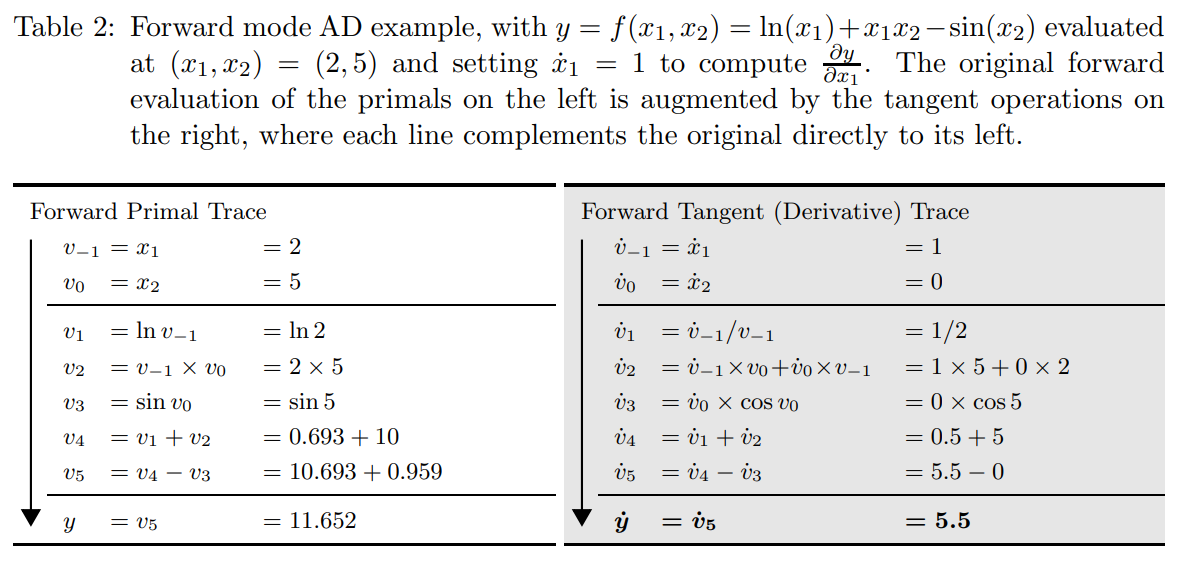

In [12]:
x1 = Dual(2, 1)
x2 = Dual(5)

y1 = Dual.Ln(x1)
y2 = x1 * x2
y3 = Dual.sin(x2)
y4 = y1 + y2
out = y5 = y4 - y3

print(f"out = {y5.real}")
print(f"dout/dx1 = {y5.epsilon_coef}")

out = 11.652071455223084
dout/dx1 = 5.5


# Question: 
Can you think of any other names for the "real" and "epsilon_coef" variables that are part of our Dual class?

# Part 2: Reverse Mode

This mode of autodiff is a bit harder to implement. With dual numbers, the derivatives just "came along for the ride". With reverse mode autodiff, the dependencies in the computational graph have to be stored in some way to correctly propagate the derivatives backwards. This means we have to store the parents of every node in the computational graph, as well as how to calculate the derivative for a given node. We'll start by creating an example class to do a binary add operation. In the __init__ method, the parents are stored in the class with the lines self.a = a and self.b = b. Note: This code was heavily inspired by code that Doug wrote.

In [13]:
class BinaryAdd:
    
    def __init__(self, a, b):
        # record the two parents of the binary add
        self.a = a
        self.b = b
        # and initialize the gradient to 0.
        self.grad = 0
        
    def forward(self):
        # a _value and b_value
        # are intermediate values in the computational graph
        # like v4 in Table 3 in the paper.
        # We don't have to store the value of a or b, 
        # but caching them now means we don't have to recompute them on the backward pass.
        self.a_value = self.a.forward()
        self.b_value = self.b.forward()
        return self.a_value + self.b_value
    
    def backward(self):
        # z = a + b
        # dz/da = ?
        # TODO: fill in the None values.
        # Remember, a and b are the parents of this object. 
        dzda = 1
        dzdb = 1
        self.a.grad += dzda*self.grad
        self.b.grad += dzdb*self.grad

        
a = 5
b = 6
ba = BinaryAdd(a, b)
ba.forward()


AttributeError: 'int' object has no attribute 'forward'

An error should happen when you run the cell above. Why is this? Notice we call the $\texttt{.forward}()$ method on both of the operands of the binary add in the binary adds $\texttt{forward}()$. This means that every value in the computational graph has to implement a $\texttt{forward}$ method, even if it's a constant. Let's do this next.

In [14]:
class Constant:
    
    def __init__(self, a):
        # Initialize the value of this variable with the value passed in
        self.a_value = a
        # to make sure our children don't throw an exception when they access our grad variable 
        # as in backward() in the BinaryAdd()
        self.grad = 0
    
    def forward(self):
        # what should this return?
        # TODO: fill in the return value
        # Remember this is the last node of the graph.
        return self.a_value
    
    def backward(self):
        # What should go here if it's a constant?
        # Nothing. We want the backpropagation to stop here. 
        # In python, we use pass as shorthand for "return None".
        # Doing this means we can inject constants at any point in the computational graph.
        pass
    
    
a = Constant(2)
b = Constant(3)
z = BinaryAdd(a, b)
y = z.forward()
z.grad = 1
print("y: {}".format(y)) # y should be 5.

y: 5


In [ ]:
z.backward()

Now implement a BinaryMul (fill in the TODOs). This should take basically the same form as BinaryAdd.

In [15]:
class BinaryMul:
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        # TODO: what's missing? What other value do we have to store in a node?
        self.grad = 0
        
    
    def forward(self):
        # again, we don't have to cache self.a_value or self.b_value
        # but it makes the backward pass not have to call a.forward() or b.forward()
        # TODO: fill in None
        self.a_value = self.a.forward()
        self.b_value = self.b.forward()
        return self.a_value*self.b_value

    def backward(self):
        # TODO: fill in the gradient values below (dzda, dzdb)
        # z = a*b 
        # dz/da = ?
        dzda = self.b_value
        dzdb = self.a_value
        self.a.grad += dzda*self.grad
        self.b.grad += dzdb*self.grad

        
a = Constant(2)
b = Constant(3)

z = BinaryMul(a, b)

# does this work?
y = z.forward()  
# y should equal 6.
print("y: {}".format(y))
z.grad = 1.0
z.backward()


y: 6


After seeding the gradient of the last node in the computational graph, we can get the gradient with respect to the inputs by calling z.backward(). To actually get the values of dz/da and dz/db, we need to examine the .grad values of a and b.

In [16]:
print("dz/da: {}, dz/db: {}".format(a.grad, b.grad))
# dz/da should be 3, and dz/db 2.

dz/da: 3.0, dz/db: 2.0


Now that we have the more elementary operations worked out, we can start implementing unary functions, like sin and the natural log. The process is basically the same as the process for the previous nodes we implemented. We'll also need a binary subtraction node.
Again, fill in the TODOs.

In [17]:
import math

class Ln:
    
    def __init__(self, a):
        self.a = a
        self.grad = 0

    def forward(self):
        # TODO: fill me in
        self.a_value = self.a.forward()
        return np.log(self.a_value)
    
    def backward(self):
        # TODO: fill me in
        # z = ln(a)
        # dz/da = ?
        dzda = 1/self.a_value
        self.a.grad += dzda*self.grad

        
class Sin:
    
    def __init__(self, a):
        self.a = a
        self.grad = 0
        
    def forward(self):
        # TODO: fill me in
        self.a_value = self.a.forward()
        return np.sin(self.a_value)
    
    def backward(self):
        # TODO: fill me in 
        # z = sin(a)
        # dz/da = ?
        dzda = np.cos(self.a_value)
        self.a.grad += dzda*self.grad


class BinarySub:
    
    def __init__(self, a, b):
        # TODO:
        # record the two parents of the binary subtract
        self.a = a
        self.b = b
        # and initialize the gradient to 0.
        self.grad = 0
        
    def forward(self):
        # TODO: How do I get a and b?
        self.a_value = self.a.forward()
        self.b_value = self.b.forward()
        return self.a_value - self.b_value
    
    def backward(self):
        # z = a - b
        # dz/da = ?
        # TODO: fill in the None values.
        # Remember, a and b are the parents of this object. 
        dzda = 1
        dzdb = -1
        self.a.grad += dzda*self.grad
        self.b.grad += dzdb*self.grad  # Why is this a += operator?
        

Now that we have all the basic logic implemented, let's use it to evaluate the function in the paper:
$$f(x_1, x_2) = ln(x_1) + x_1x_2 - sin(x_2). $$

Below is the trace that the authors used.

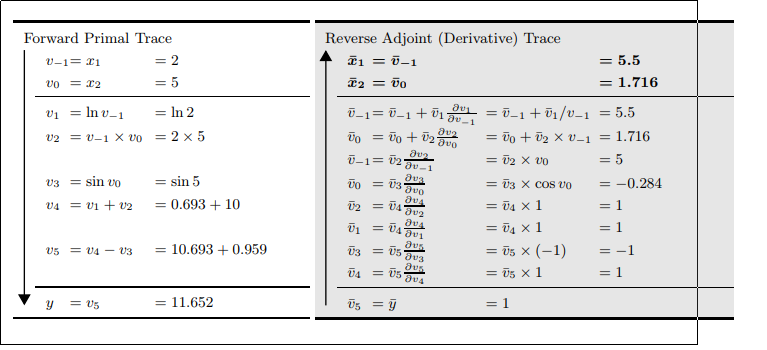

I started the forward trace with x1, x2, and v1. Fill in the rest. You'll also need to seed the gradient value of the last node. Formally, the gradient seed should be $\frac{\partial v_5}{\partial v_5}$.


In [18]:
x1 = Constant(2)
x2 = Constant(5)

v1 = Ln(x1)
### TODO: fill in the rest of the forward trace.
v2 = BinaryMul(x1,x2)
v3 = Sin(x2)
v4 = BinaryAdd(v1,v2)
v5 = BinarySub(v4,v3)
# Does the answer agree with the paper? y should be 11.65.
y = v5.forward()
print('y: {}'.format(y))

# TODO: seed the gradient value
v5.grad = 1.0
v5.backward()

# Instead of calling backward() on each node by hand, put the nodes in 
# a list and iterate over it backwards.

ls = [x1, x2, v1, v2, v3, v4]
v5.grad = 1.0
for node in ls[::-1]:
    node.backward()

    
# should be 1.716 and 5.5
print(x2.grad, x1.grad)


y: 11.652071455223084
1.7163378145367738 5.5


# Reverse mode questions: 
1. Would the backward trace work if we set up the list in this order: [x1, x2, v4, v3, v2]? Why or why not?
2. How would we modify the reverse mode code so we can call .backward() only on the last node and not have to iterate over a list?
3. Graphs have to be directed acyclic graphs for this sort of reverse mode autodiff to work. When we create the list [x1, x2, v1, v2, v3, v4], what are we doing to the nodes of the graph? Think back to data structures.


1. The backward trace does not work if the list is in the order [x1, x2, v4, v3, v2]. We can see that by simplying running the code with the list set that way. It doesn't work because AD works by accumulating gradients. For AD to work, the output must be computed before we start to compute any gradients because the reverse mode gradient is computed from the previous node.

2. We would need to add code to calculate the gradients for the intermediary steps, that way all the information we need to run reverse mode is contained within the last node.

3. When we create the list, we are essentially defining the order in which we compute and accumulate gradients.